In [11]:
import numpy as np
import pandas as pd
df=pd.read_csv('ibm_stock.csv')
df.drop(['High', 'Low','Volume','Open','Adj Close'], axis=1, inplace=True)

In [12]:
#Converting Date into timestamp 
from datetime import datetime
a=[]
for i in range(0,754):
    x=df['Date'][i]
    datetime_obj=datetime.strptime(x,'%Y-%m-%d')
    a.append(datetime.timestamp(datetime_obj))

In [13]:
df['Date']=a
df.head()

,Date,Close
0,1.483382e+09,167.190002
1,1.483468e+09,169.259995
2,1.483555e+09,168.699997
3,1.483641e+09,169.529999
4,1.483900e+09,167.649994


In [14]:
#Creating training and testing dataset
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size = 0.2,random_state=2)

x_train = train.drop('Close', axis=1)
y_train = train['Close']

x_test = test.drop('Close', axis = 1)
y_test = test['Close']

In [15]:
x_tr=x_train
y_tr=y_train
x_ts=x_test
y_ts=y_test

In [16]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [17]:
#importing packages for XGBoost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [18]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [20]:
# make predictions for test data
y_pred = model.predict(x_test)
y_pred

C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([142.47999573, 138.52000427, 141.13000488, 139.19999695,
       153.67999268, 145.99000549, 120.38999939, 143.22000122,
       135.55000305, 160.91000366, 134.38000488, 150.83999634,
       162.49000549, 143.91000366, 133.30999756, 135.08999634,
       160.8999939 , 139.11000061, 141.83999634, 135.08999634,
       153.96000671, 156.00999451, 153.5       , 174.52000427,
       145.99000549, 153.67999268, 135.19000244, 151.5       ,
       145.99000549, 141.42999268, 135.97000122, 143.74000549,
       139.19999695, 174.52000427, 143.63999939, 135.97000122,
       151.3500061 , 135.52999878, 153.67999268, 174.52000427,
       135.52999878, 145.99000549, 153.67999268, 146.49000549,
       161.69999695, 135.52999878, 146.47999573, 153.67999268,
       138.        , 143.8999939 , 166.80000305, 135.52999878,
       135.55000305, 118.15000153, 135.52999878, 119.33999634,
       146.72000122, 153.80999756, 153.67999268, 142.11000061,
       174.52000427, 147.02999878, 153.80999756, 136.32

In [21]:
dp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dp['Date']=x_ts
sort_by_time = dp.sort_values('Date')
sort_by_time.head()

,Actual,Predicted,Date
1,169.259995,169.529999,1.483468e+09
15,178.289993,174.520004,1.485283e+09
18,175.800003,174.520004,1.485715e+09
20,174.289993,174.520004,1.485887e+09
22,175.820007,166.800003,1.486060e+09


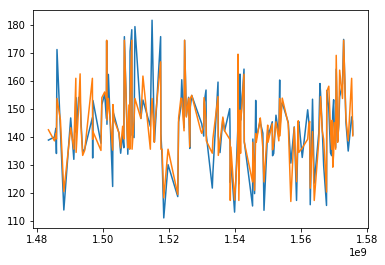

In [23]:
#plotting the y_test and y_pred
import matplotlib.pyplot as plt
plt.plot(sort_by_time['Date'],dp['Actual'])
plt.plot(sort_by_time['Date'],dp['Predicted'])

In [25]:
#MAPE
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
get_mape(sort_by_time['Actual'],sort_by_time['Predicted'])

3.4955100607766827

In [27]:
from statsmodels.tools.eval_measures import rmse
rmse(sort_by_time['Actual'],sort_by_time['Predicted'])

7.211677235670719